In [3]:
import torch
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader

In [4]:
def BinaryFashionMNISTcreate_imbalanced_datasets(
        root='data',
        download=True,
        batch_size=64,
        random_seed = 42,
        fractions=[0.005, 0.01, 0.02, 0.05, 0.1, 0.2],
):
    np.random.seed(random_seed)
    torch.manual_seed(random_seed)
    fashionmnist_transform = transforms.ToTensor()
    Full_train_dataset = datasets.FashionMNIST(root=root, train=True, transform=fashionmnist_transform, download=download)
    train_data = Full_train_dataset.data
    train_laebls = Full_train_dataset.targets
    train_index_label3 = (train_laebls == 3)
    train_index_label4 = (train_laebls == 4)


    train_data_label3 = train_data[train_index_label3]
    train_data_label4 = train_data[train_index_label4]
    train_labels_label3 = train_laebls[train_index_label3]
    train_labels_label4 = train_laebls[train_index_label4]
    num_label4 = len(train_data_label4)
    num_label3 = len(train_data_label3)
    print('Number of images with label 3:', num_label3)
    print('Number of images with label 4:', num_label4)


    train_datasets_dict = {}
    for fraction in fractions:
        num_label3_need  = int(num_label4 * fraction)
        chosen_indices_label3 = np.random.choice(len(train_data_label3), num_label3_need, replace=False)
        subset_label3_data = train_data_label3[chosen_indices_label3]
        subset_label3_labels = train_labels_label3[chosen_indices_label3]

        new_train_data = torch.cat((train_data_label4, subset_label3_data), dim=0)
        new_train_labels = torch.cat((train_labels_label4, subset_label3_labels), dim=0)
        new_train_dataset = TensorDataset(new_train_data, new_train_labels)
        
        train_dataloader = DataLoader(new_train_dataset, batch_size=batch_size, shuffle=True)
        train_datasets_dict[f'train_{fraction}'] = train_dataloader

    Full_test_dataset = datasets.FashionMNIST(root=root, train=False, transform=fashionmnist_transform, download=download)
    test_data = Full_test_dataset.data
    test_labels = Full_test_dataset.targets
    test_index_label34 = (test_labels == 3) | (test_labels == 4)
    test_data = test_data[test_index_label34]
    test_labels = test_labels[test_index_label34]
    test_dataset = TensorDataset(test_data, test_labels)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
    data_loaders_dict = {**train_datasets_dict, **{'test': test_dataloader}}

    return data_loaders_dict


In [5]:
if __name__ == '__main__':
    BinaryFashionMNISTDataLoader = BinaryFashionMNISTcreate_imbalanced_datasets(
        root = '/Users/max/MasterThesisData/FashionMNIST',
        download=True,
        batch_size=64,
        random_seed = 42,
        fractions=[0.005, 0.01, 0.02, 0.05, 0.1, 0.2],
    )
    FashionMNIST_train_loader0005 = BinaryFashionMNISTDataLoader['train_0.005']
    FashionMNIST_train_loader001 = BinaryFashionMNISTDataLoader['train_0.01']
    FashionMNIST_train_loader002 = BinaryFashionMNISTDataLoader['train_0.02']
    FashionMNIST_train_loader005 = BinaryFashionMNISTDataLoader['train_0.05']
    FashionMNIST_train_loader010 = BinaryFashionMNISTDataLoader['train_0.1']
    FashionMNIST_train_loader020 = BinaryFashionMNISTDataLoader['train_0.2']
    FashionMNIST_test_loader = BinaryFashionMNISTDataLoader['test']
    print('Number of batches in train_0.005:', len(FashionMNIST_train_loader0005))
    print('Number of batches in train_0.01:', len(FashionMNIST_train_loader001))
    print('Number of batches in train_0.02:', len(FashionMNIST_train_loader002))
    print('Number of batches in train_0.05:', len(FashionMNIST_train_loader005))
    print('Number of batches in train_0.1:', len(FashionMNIST_train_loader010))
    print('Number of batches in train_0.2:', len(FashionMNIST_train_loader020))
    print('Number of batches in test:', len(FashionMNIST_test_loader))
    print('Number of images in train_0.005:', len(FashionMNIST_train_loader0005.dataset))
    print('Number of images in train_0.01:', len(FashionMNIST_train_loader001.dataset))
    print('Number of images in train_0.02:', len(FashionMNIST_train_loader002.dataset))
    print('Number of images in train_0.05:', len(FashionMNIST_train_loader005.dataset))
    print('Number of images in train_0.1:', len(FashionMNIST_train_loader010.dataset))
    print('Number of images in train_0.2:', len(FashionMNIST_train_loader020.dataset))
    print('Number of images in test:', len(FashionMNIST_test_loader.dataset))

Number of images with label 3: 6000
Number of images with label 4: 6000
Number of batches in train_0.005: 95
Number of batches in train_0.01: 95
Number of batches in train_0.02: 96
Number of batches in train_0.05: 99
Number of batches in train_0.1: 104
Number of batches in train_0.2: 113
Number of batches in test: 32
Number of images in train_0.005: 6030
Number of images in train_0.01: 6060
Number of images in train_0.02: 6120
Number of images in train_0.05: 6300
Number of images in train_0.1: 6600
Number of images in train_0.2: 7200
Number of images in test: 2000


In [6]:
# save the data loaders to pkl file
import pickle
Binary_FashionMNIST_DataLoaders = {
    "train_0.005": FashionMNIST_train_loader0005,
    "train_0.01": FashionMNIST_train_loader001,
    "train_0.02": FashionMNIST_train_loader002,
    "train_0.05": FashionMNIST_train_loader005,
    "train_0.10": FashionMNIST_train_loader010,
    "train_0.20": FashionMNIST_train_loader020,
    "test": FashionMNIST_test_loader
}

with open('Binary_FashionMNIST_DataLoaders.pkl', 'wb') as f:
    pickle.dump(Binary_FashionMNIST_DataLoaders, f)
    print('Binary_FashionMNIST_DataLoaders.pkl is saved.')

Binary_FashionMNIST_DataLoaders.pkl is saved.


# Analysis Imbalanced Datasets (MNIST)

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def Multi_get_class_distirbution(data_loader):
    class_distribution = {}
    for i, (data, target) in enumerate(data_loader):
        for label in target:
            label = label.item()
            if label in class_distribution:
                class_distribution[label] += 1
            else:
                class_distribution[label] = 1
    return class_distribution

In [8]:
class_distribution_train0005 = Multi_get_class_distirbution(FashionMNIST_train_loader0005)
class_distribution_train001 = Multi_get_class_distirbution(FashionMNIST_train_loader001)
class_distribution_train002 = Multi_get_class_distirbution(FashionMNIST_train_loader002)
class_distribution_train005 = Multi_get_class_distirbution(FashionMNIST_train_loader005)
class_distribution_train010 = Multi_get_class_distirbution(FashionMNIST_train_loader010)
class_distribution_train020 = Multi_get_class_distirbution(FashionMNIST_train_loader020)
class_distribution_test = Multi_get_class_distirbution(FashionMNIST_test_loader)

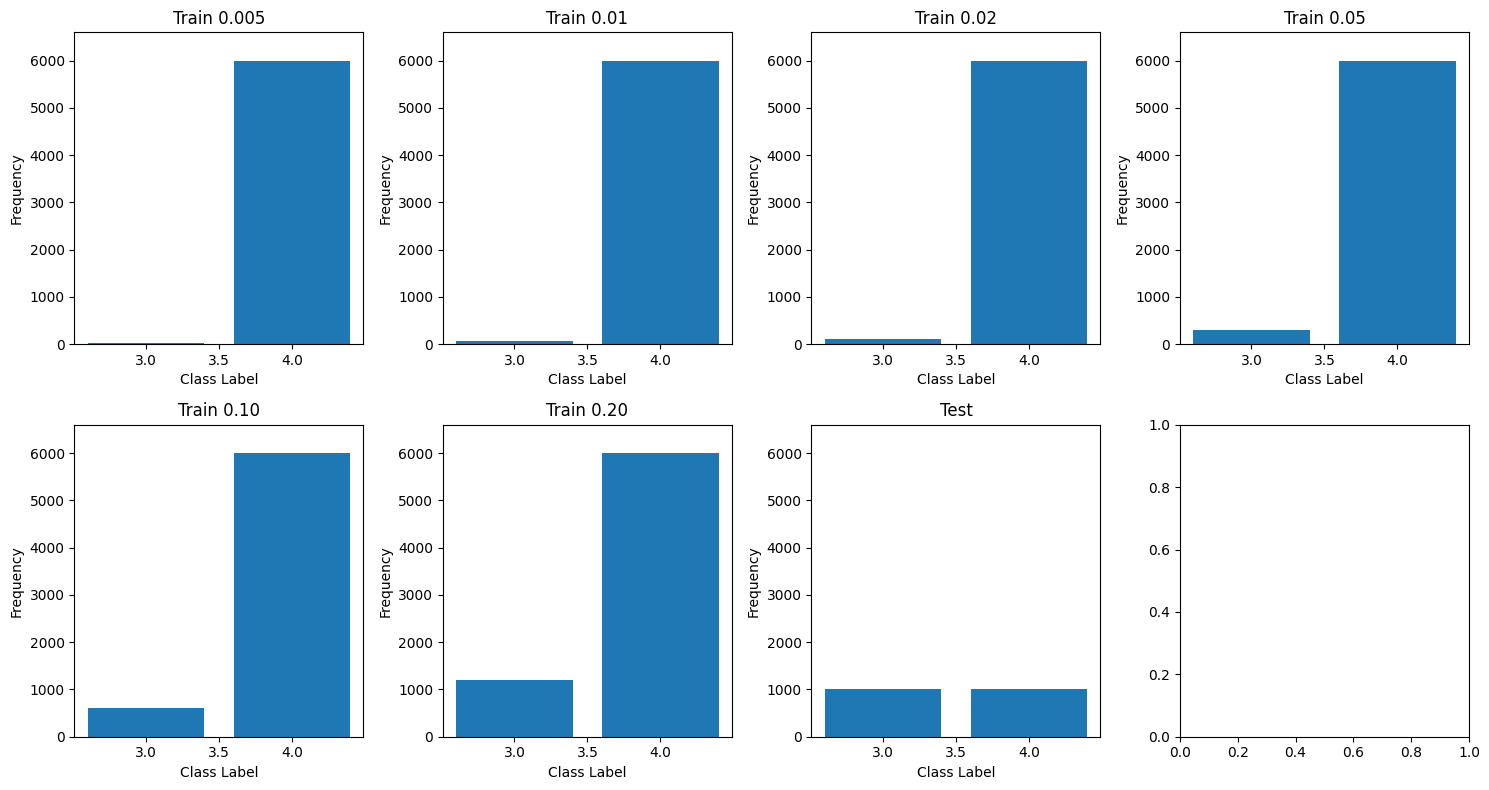

In [9]:
import matplotlib.pyplot as plt


dists = [
    (class_distribution_train0005, 'Train 0.005'),
    (class_distribution_train001, 'Train 0.01'),
    (class_distribution_train002, 'Train 0.02'),
    (class_distribution_train005, 'Train 0.05'),
    (class_distribution_train010, 'Train 0.10'),
    (class_distribution_train020, 'Train 0.20'),
    (class_distribution_test,    'Test')
]


fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()  


max_count = max([max(dist_dict.values()) for dist_dict, _ in dists])

for ax, (dist_dict, title) in zip(axes, dists):
    
    ax.bar(dist_dict.keys(), dist_dict.values())
    ax.set_title(title)
    ax.set_xlabel('Class Label')
    ax.set_ylabel('Frequency')
    
    ax.set_ylim([0, max_count * 1.1]) 

plt.tight_layout()
plt.show()